In [1]:
# Statystyki opisowe – rozkład normalny

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [3]:
np.random.seed(0)  # dla powtarzalności

# Dane z rozkładu normalnego N(3, 1)
data_100 = np.random.normal(loc=3, scale=1, size=100)
data_10000 = np.random.normal(loc=3, scale=1, size=10000)

In [4]:
def describe_data(data):
    return {
        'Średnia': np.mean(data),
        'Mediana': np.median(data),
        'Odchylenie standardowe': np.std(data, ddof=1),
        'Wariancja': np.var(data, ddof=1),
        'Minimum': np.min(data),
        'Maksimum': np.max(data),
        'Q1': np.percentile(data, 25),
        'Q2 (mediana)': np.percentile(data, 50),
        'Q3': np.percentile(data, 75),
        'Skośność': skew(data),
        'Kurtoza': kurtosis(data)
    }

In [5]:
stats_100 = describe_data(data_100)
stats_10000 = describe_data(data_10000)

# Tworzymy DataFrame do porównania
df_stats = pd.DataFrame({
    '100 obserwacji': stats_100,
    '10 000 obserwacji': stats_10000
})

df_stats

,100 obserwacji,10 000 obserwacji
Średnia,3.059808,2.982006
Mediana,3.094096,2.972513
Odchylenie standardowe,1.012960,0.987278
Wariancja,1.026087,0.974718
Minimum,0.447010,-0.740101
Maksimum,5.269755,6.801660
Q1,2.356143,2.311403
Q2 (mediana),3.094096,2.972513
Q3,3.737077,3.649365
Skośność,0.005172,0.022935


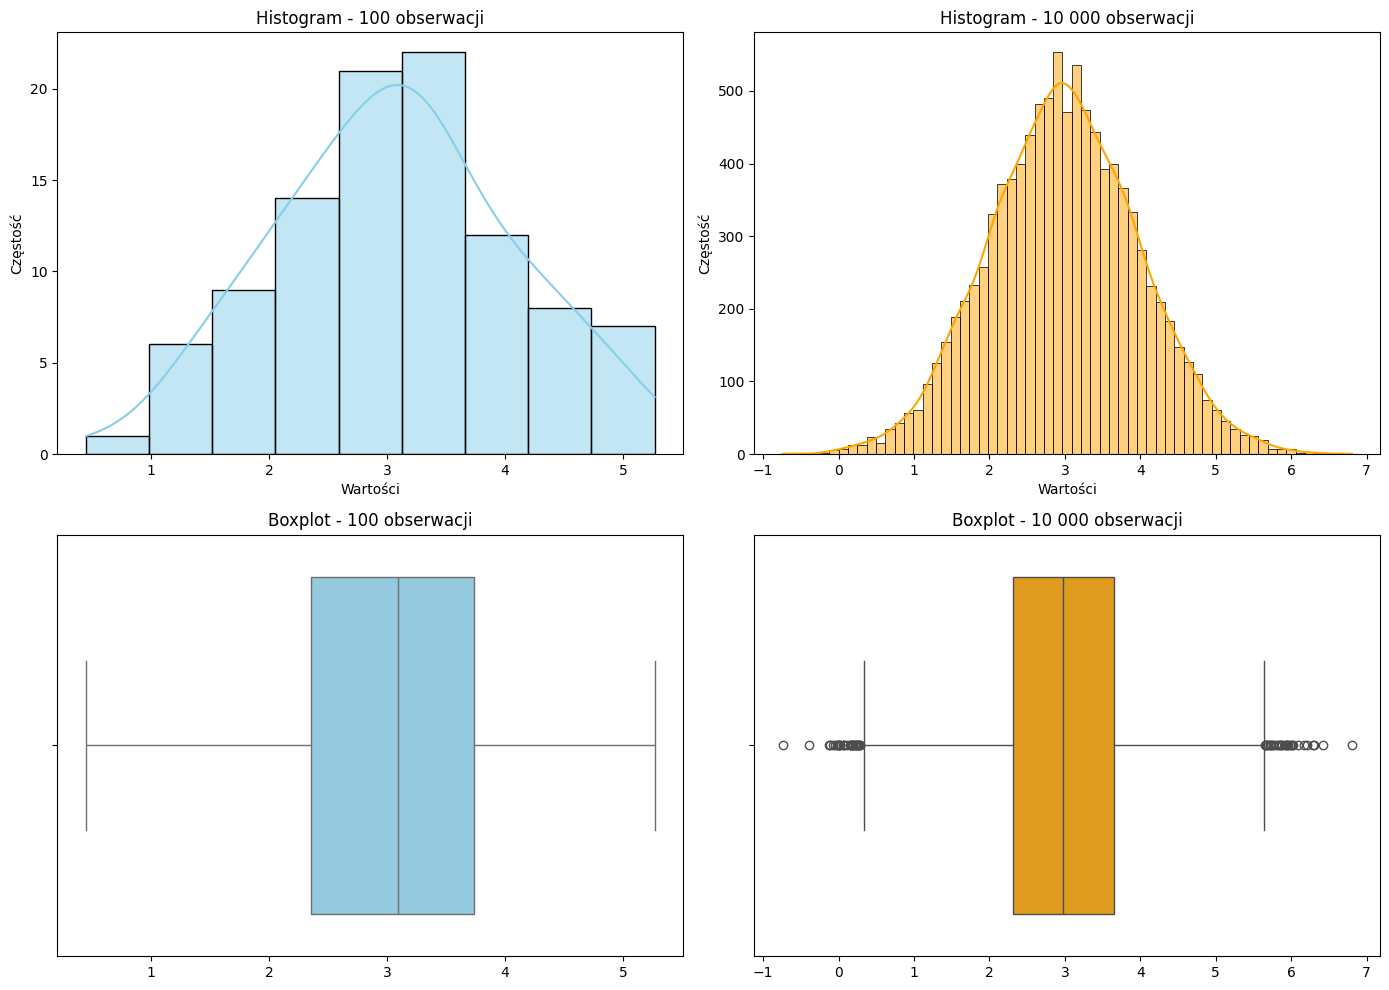

In [6]:
# Tworzymy wykresy: histogramy i boxploty
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram – 100 obserwacji
sns.histplot(data_100, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Histogram - 100 obserwacji")
axes[0, 0].set_xlabel("Wartości")
axes[0, 0].set_ylabel("Częstość")

# Histogram – 10 000 obserwacji
sns.histplot(data_10000, kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title("Histogram - 10 000 obserwacji")
axes[0, 1].set_xlabel("Wartości")
axes[0, 1].set_ylabel("Częstość")

# Boxplot – 100 obserwacji
sns.boxplot(x=data_100, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title("Boxplot - 100 obserwacji")

# Boxplot – 10 000 obserwacji
sns.boxplot(x=data_10000, ax=axes[1, 1], color='orange')
axes[1, 1].set_title("Boxplot - 10 000 obserwacji")

plt.tight_layout()
plt.show()

## Wnioski

- Dla większej próby (10 000 obserwacji) statystyki są bliższe wartościom teoretycznym (średnia około 3, odchylenie około 1).
- Średnia i mediana są prawie identyczne — świadczy to o symetrii rozkładu normalnego.
- Wariancja i odchylenie standardowe są stabilniejsze w dużej próbce.
- W małej próbce (100) występuje większy rozrzut wartości ekstremalnych.
- Histogram dla 10 000 obserwacji pokazuje gładką krzywą normalną, a boxplot jest bardziej „spójny”.
- Skośność i kurtoza są bliższe 0 w dużej próbce — to także cecha rozkładu normalnego.